In [1]:
#!pip install 

In [43]:
import numpy as np
import pandas as pd

In [44]:
# creer un dataset de 400 clients avec les colonnes
nb = 400
customer_id = np.random.randint(1000, 9999, size=nb)

age = np.random.uniform(16, 75, size=nb)

gender_option = ['M', 'F','other','Prefer not to say']
gender = np.random.choice(gender_option, size=nb)

country_option = ['France', 'Senegal', 'Maroc', 'cameroun','kenya','togo','mali','zambie']
country = np.random.choice(country_option , size=nb)

start = pd.to_datetime('2018-01-01')
end_join = pd.to_datetime('2025-06-01')
today = pd.to_datetime('2026-01-01')

join_dates = []
last_dates = []

for _ in range(nb):
    join_d=start + pd.Timedelta(days=np.random.randint(0,(end_join-start).days + 1))
    last_d=join_d +pd.Timedelta(days=np.random.randint(0,(today-join_d).days +1))
    join_dates.append(join_d)
    last_dates.append(last_d)
    

total_spent = np.random.uniform(0,12000, size=nb)

nb_purchase = np.random.randint(0, 180, size=nb)

avg_basket = total_spent/nb_purchase

category = ['Electronics', 'Fashion', 'Home', 'Mixed', 'None']
category_pref = np.random.choice(category, size=nb)

satisfaction_score = np.random.randint(1, 5, size=nb)

returned_items = np.random.uniform(0,60, size=nb)

# creer un dictionnaire dataframe pour stocker les donnees
df = pd.DataFrame({
    "customer_id":customer_id,
    "age":age,
    "gender":gender,
    "country":country,
    "join_dates":join_dates,
    "last_dates":last_dates,
    "total_spent":total_spent,
    "nb_purchase":nb_purchase,
    "avg_basket":avg_basket,
    "category_pref":category_pref,
    "satisfaction_score":satisfaction_score,
    "returned_items":returned_items
})
df

#gerer les bruits NaN
df.loc[df.sample(frac=0.04).index, 'age'] =np.NaN #4% pour age
df.loc[df.sample(frac=0.02).index, 'gender']=np.NaN #2% pour gender
df.loc[df.sample(frac=0.01).index, 'last_dates']=np.NaN #1% pour last purchase date
df.loc[df.sample(frac=0.05).index, 'category_pref']=np.NaN #5% pour les category
df.loc[df.sample(frac=0.08).index, 'satisfaction_score']=np.NaN


In [45]:
df.isnull().sum()

customer_id            0
age                   16
gender                 8
country                0
join_dates             0
last_dates             4
total_spent            0
nb_purchase            0
avg_basket             0
category_pref         20
satisfaction_score    32
returned_items         0
dtype: int64

In [46]:
df.shape

(400, 12)

In [47]:
df.dtypes #type de chaque colonnes

customer_id                    int32
age                          float64
gender                        object
country                       object
join_dates            datetime64[ns]
last_dates            datetime64[ns]
total_spent                  float64
nb_purchase                    int32
avg_basket                   float64
category_pref                 object
satisfaction_score           float64
returned_items               float64
dtype: object

In [48]:
df.ndim

2

In [49]:
#calcule la moyenne ,ecart-type,median et la correlation pour age 
ages = df['age'].values #pour extraire dans le dataframe
mean_age = np.nanmean(ages)
stds_age = np.nanstd(ages)
mediane_age = np.nanmedian(ages)
print("la moyenne pour l'age est :",mean_age)
print("la dispersion pour l'age est :",stds_age)
print("la mediane pour l'age est :",mediane_age)

la moyenne pour l'age est : 45.04836289790449
la dispersion pour l'age est : 17.47035890068397
la mediane pour l'age est : 44.22229915747307


In [50]:
#Clients plus anciens (join_date ancien) ont tendance à avoir plus dépensé
#(corrélation positive modérée)
#on fait la difference entre la date du jour et celle de l'inscription
today =pd.to_datetime('2026-01-01')
ancien_date = (today - pd.to_datetime(df['join_dates'])).dt.days.values

df['total_spent']=(df['total_spent'] * 0.8) + (ancien_date * 5)
depenses =np.nan_to_num(df['total_spent'].values)
 #on fixe la date du jour


#calcule de la correlation
cor = np.corrcoef(ancien_date, depenses)[0, 1]
cor



0.8308118843249446

In [51]:
#Clients satisfaits (score ≥ 4) ont moins de retours
#on gere les deux satisfaits et non
satisfait = df[df['satisfaction_score'] >= 4]
non_satisfait = df[df['satisfaction_score'] < 4]

#on calcule la moyenne
means_satisfait = np.nanmean(satisfait['returned_items'].values)
means_non_satisfait = np.nanmean(non_satisfait['returned_items'].values)

#print out
print(f"la moyenne des clients satisfaits sont : {means_satisfait:.2f}%")
print(f"la moyenne des clients non satisfaits sont : {means_non_satisfait:.2f}%")

la moyenne des clients satisfaits sont : 29.78%
la moyenne des clients non satisfaits sont : 29.22%


In [52]:
#nettoyage et feature engeenering
#remplace les genders incoherents par others
#on utilse np.where : condition-vrai-faux
valide = ['M','F']
df['gender'] = np.where(
    df['gender'].isin(valide) | df['gender'].isna(),
    df['gender'],
    'other'
)
df['gender']

0          M
1      other
2          F
3      other
4      other
       ...  
395        F
396    other
397    other
398    other
399    other
Name: gender, Length: 400, dtype: object

In [53]:
#imputer les valeurs manquantes pat leurs medianes

df['age'] = df.groupby('country')['age'].transform(lambda x:x.fillna(x.median()))
df['category_pref']= df['category_pref'].fillna("Unknow")
df['satisfaction_score'] = df['satisfaction_score'].fillna(df['satisfaction_score'].median())

In [54]:
df.isnull().sum()

customer_id           0
age                   0
gender                8
country               0
join_dates            0
last_dates            4
total_spent           0
nb_purchase           0
avg_basket            0
category_pref         0
satisfaction_score    0
returned_items        0
dtype: int64

In [55]:
#sauvegarder par csv
df.to_csv('exercice.csv', index=False)
print("le fichier sauvegarder avec succes")

le fichier sauvegarder avec succes


In [56]:
#Crée la colonne recency_days = jours depuis dernier achat (utilise .dt.days)
#on fixe d'abord la date d'aujoud'hui
today = pd.to_datetime('2026-05-08')

#on calcule 
df['recency_day'] = (today -pd.to_datetime((df['last_dates']))).dt.days

#gerer les NaN sur last_days
df['recency_day'] = df['recency_day'].clip(lower=0) 
df['recency_day']

0       318.0
1      2033.0
2       764.0
3      1139.0
4      1792.0
        ...  
395    1125.0
396     907.0
397     306.0
398     542.0
399    2279.0
Name: recency_day, Length: 400, dtype: float64

In [57]:
#Crée tenure_days = jours depuis inscription
#on fixe la date d'aujourd'hui
today = pd.to_datetime('2026-05-08')

#on calcule
df['teneur_day'] = (today - pd.to_datetime(df['join_dates'])).dt.days

#on gere les NaN
df['teneur_day'] = df['teneur_day'].clip(lower=0)
df['teneur_day']

0      3031
1      2176
2      2413
3      1756
4      2147
       ... 
395    1684
396    1522
397    1799
398     564
399    2955
Name: teneur_day, Length: 400, dtype: int64

In [58]:
#Crée monetary_per_month = total_spent / (tenure_days / 30 + 0.1)
df['monetary_per_month'] = df['total_spent']/(df['teneur_day']/(30 + 0.1))
#pour eviter les valeurs negatives
df['monetary_per_month'] = df['monetary_per_month'].clip(lower=0)
df['monetary_per_month'].describe().round(2)

count    400.00
mean     256.14
std      105.61
min      105.71
25%      186.79
50%      228.43
75%      284.44
max      821.70
Name: monetary_per_month, dtype: float64

In [59]:
#controle pour la moyenne
print(f"la moyenne est :{df['monetary_per_month'].mean():.2f} ")
#df['monetary_per_month'].mean().round(2)

la moyenne est :256.14 


In [60]:
#Crée une colonne is_inactive = 1 si recency_days > 365 sinon 0
df['is_inactive'] = np.where( df['recency_day'] > 365,1,0)

print("le nombre de clients qui sont :", df['is_inactive'].value_counts())
    

le nombre de clients qui sont : is_inactive
1    303
0     97
Name: count, dtype: int64


In [61]:
#Crée une colonne risk_churn_score = combinaison linéaire simple 
#(exemple : 0.4recency + 0.3(1-satisfaction) + 0.3*returned_pct)
#normaliser tout sur un echelle de 0 et 1
#on divise la recence par son max
recency_norm = df['recency_day']/df['recency_day'].max()

#on inverse la satisfaction et le diviser en 5
sat_score= 1 - (df['satisfaction_score'] / 5)

#on divise les retours par 100
retour = df['returned_items'] / 100 

df['risk_churn_score']=0.4 * recency_norm+ 0.3 * sat_score + 0.3 * retour
df['risk_churn_score'].round(2)

0      0.17
1      0.40
2      0.40
3      0.43
4      0.47
       ... 
395    0.49
396    0.37
397    0.25
398    0.27
399    0.51
Name: risk_churn_score, Length: 400, dtype: float64

In [62]:
#on filtre les clients qui ont plus de la moyenne et un risk_churn_score au dela de 0.6
clients_vip = df[(df['monetary_per_month'] > 254) & (df['risk_churn_score']  > 0.4)]
print(clients_vip[['customer_id','monetary_per_month','risk_churn_score']].head().round(2))

    customer_id  monetary_per_month  risk_churn_score
4          6166              262.48              0.47
6          7609              337.38              0.41
24         2572              275.59              0.52
34         3437              273.01              0.52
37         8233              282.29              0.44


In [28]:
len(clients_vip)

24

In [29]:
print(clients_vip['country'].value_counts())

country
Maroc       6
cameroun    4
kenya       4
France      3
zambie      2
togo        2
Senegal     2
mali        1
Name: count, dtype: int64


In [30]:
#Convertis returned_items_pct en 4 catégories : 'Low' (<10%), 'Medium', 'High', 'Very High'
def segment(valeur):
    if valeur <10:
        return 'Low'
    elif valeur <30:
        return 'Medium'
    elif valeur <50:
        return 'high'
    else:
        return 'Very High'

#appelle la fonction
df['return_category'] = df['returned_items'].apply(segment)
print(df['return_category'].value_counts())

return_category
Medium       156
high         119
Low           64
Very High     61
Name: count, dtype: int64


In [31]:
#Profil moyen des clients inactifs vs actifs (groupby + mean)
profil_moyen = df.groupby('is_inactive')[['monetary_per_month','satisfaction_score','risk_churn_score']].mean()

print(profil_moyen.round(2))

             monetary_per_month  satisfaction_score  risk_churn_score
is_inactive                                                          
0                        331.60                2.47              0.27
1                        237.77                2.59              0.38


In [32]:
#Top 10 clients avec le plus haut risk_churn_score → affiche toutes leurs colonnes
top_client = df.sort_values(by="risk_churn_score", ascending = False).head(10)
print("les 10 top clients sont  :\n", top_client.round(2))

les 10 top clients sont  :
      customer_id    age gender  country join_dates last_dates  total_spent  \
139         1729  34.71  other     mali 2019-02-22 2019-03-30     13940.14   
160         9195  23.39      M  Senegal 2018-02-08 2019-04-02     17183.43   
134         6023  64.60  other     mali 2018-05-05 2019-04-19     23364.63   
1           9611  41.39  other     mali 2018-07-11 2020-06-12     14689.33   
131         6027  32.42  other  Senegal 2018-06-10 2019-01-16     15798.97   
320         5446  23.69  other   zambie 2018-05-11 2018-08-17     19003.19   
145         6501  55.69      M   France 2018-02-28 2018-07-24     23535.82   
49          9436  50.60  other   France 2019-07-22 2019-10-22     12096.84   
90          3574  21.35  other     mali 2018-08-27 2019-03-02     19936.74   
296         2974  26.19      M     togo 2018-03-30 2019-06-16     16770.28   

     nb_purchase  avg_basket category_pref  satisfaction_score  \
139          139       12.73          Home     

In [33]:
top_client.to_csv('top_client_a_risq.csv',index=False)
print("le fichier est sauvegarder avec succes")

le fichier est sauvegarder avec succes


In [34]:
#Répartition des dépenses totales par pays (groupby + sum + sort)
depense_pays = df.groupby('country')['total_spent'].sum().sort_values()
print("les depenses par pays sont :\n " , depense_pays.round(2))

les depenses par pays sont :
  country
Senegal     511844.42
togo        526445.78
zambie      531541.16
cameroun    571224.98
France      579947.74
mali        616634.61
kenya       705134.13
Maroc       710514.73
Name: total_spent, dtype: float64


In [35]:
#Pourcentage de clients inactifs par catégorie préférée
client_inactif = df.groupby('return_category')['is_inactive'].mean() *100
print('Pourcentage de clients inactifs par catégorie préféré sont : \n', client_inactif.sort_values().round(2))

Pourcentage de clients inactifs par catégorie préféré sont : 
 return_category
Medium       70.51
high         74.79
Low          78.12
Very High    81.97
Name: is_inactive, dtype: float64


In [36]:
#top des 5% clients les plus riches
seuil = np.percentile(df['total_spent'], 95)
#clients VIP
top_5 = df[df['total_spent'] >= seuil]
#comparer avec la moyenne
print("le seuil des 5% : ", seuil.round(2))
print("la moyenne d'age des clients riches", top_5['age'].mean().round(2))
print("la moyenne globale de  l'age ", df['age'].mean().round(2))

le seuil des 5% :  20525.63
la moyenne d'age des clients riches 46.01
la moyenne globale de  l'age  43.42


In [37]:
import piplite
await piplite.install('seaborn')

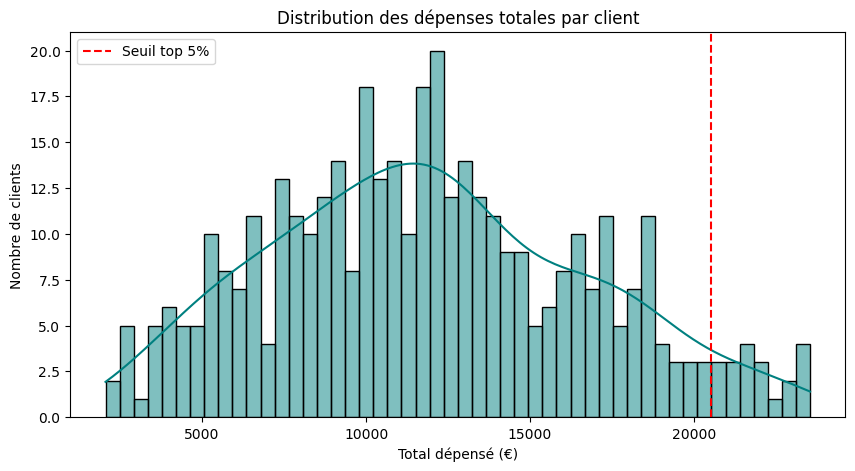

In [38]:
#graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 5))

# Histogramme + KDE
sns.histplot(data=df, x='total_spent', bins=50, kde=True, color='teal')
plt.axvline(np.percentile(df['total_spent'], 95), color='red', linestyle='--', 
            label='Seuil top 5%')
plt.title('Distribution des dépenses totales par client')
plt.xlabel('Total dépensé (€)')
plt.ylabel('Nombre de clients')
plt.legend()
plt.show()

# Option : log scale si queue très longue
# plt.xscale('log')

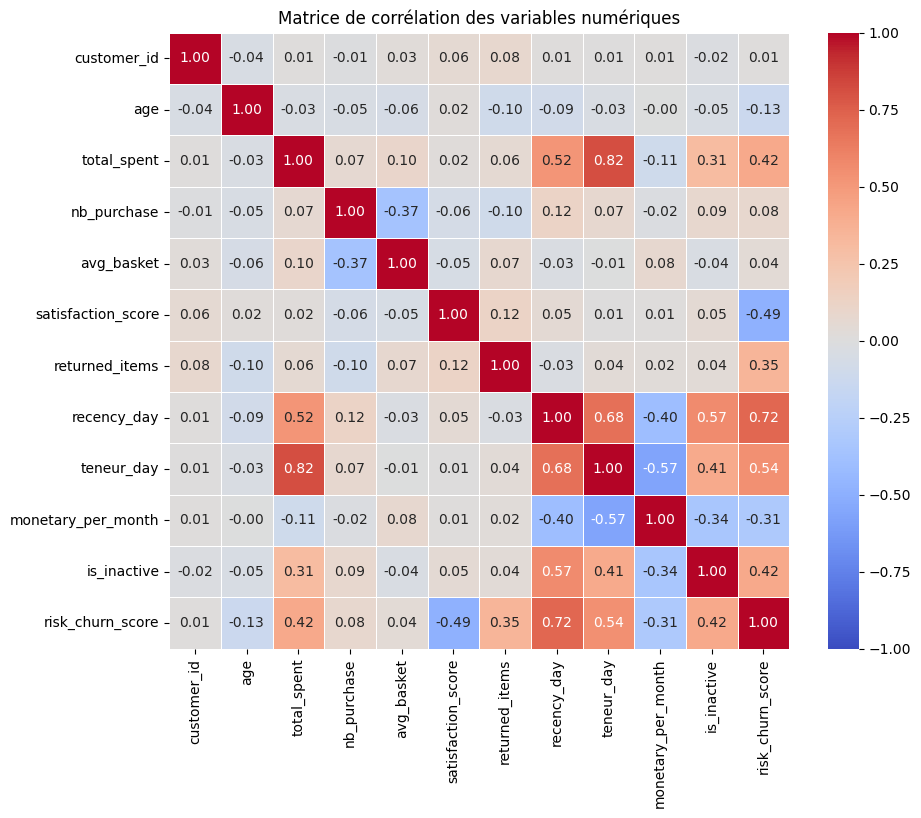

In [39]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', 
            vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matrice de corrélation des variables numériques')
plt.show()

In [72]:
#Calcule les quantiles (qcut ou np.percentile) pour :
#Recency → score 1 (récent) à 5 (ancien)
df['recency_day'] = df['recency_day'].fillna(df['recency_day'].max())
df['R_score'] = pd.qcut(
   df['recency_day'],
    q = 5,
    labels = range(1,6),
    duplicates = 'drop'
).astype(int)

print(" le score du recence en quantile : " , df['R_score'].value_counts().sort_index())
#print(df['R_score'].describe())

 le score du recence en quantile :  R_score
1    80
2    80
3    80
4    80
5    80
Name: count, dtype: int64


In [73]:
#Frequency (nb_purchases) → 1 (faible) à 5 (élevé)
df['F_score'] = pd.qcut(
    df['nb_purchase'],
    q = 5,
    labels = range(1,6),
    duplicates = 'drop'
).astype(int)

print("le score du frquence en quantile est :", df['F_score'].value_counts().sort_index())




le score du frquence en quantile est : F_score
1    80
2    80
3    80
4    80
5    80
Name: count, dtype: int64


In [76]:
#Monetary (total_spent) → 1 (faible) à 5 (élevé)
df['M_score'] = pd.qcut(
    df['total_spent'],
    q = 5,
    labels = range(1,6),
    duplicates = 'drop'
).astype(int)

print("le score du montant en quantile est :", df['M_score'].value_counts().sort_index())

le score du montant en quantile est : M_score
1    80
2    80
3    80
4    80
5    80
Name: count, dtype: int64


In [81]:
#creer le score globale RFM
df['RFM_total'] = (6 - df['R_score']) + df['M_score'] + df['F_score']
print("Le RFM total est :", df['RFM_total'].value_counts().sort_index())

Le RFM total est : RFM_total
4      2
5     12
6     20
7     60
8     68
9     81
10    66
11    53
12    26
13     6
14     4
15     2
Name: count, dtype: int64


In [92]:
#Crée 4 segments business :Champions (RFM ≥ 12)
#Loyaux (RFM 9–11)
#À risque (RFM 6–8)
#Perdus (RFM ≤ 5)
limites = [0 , 7, 10, 13, 15]#definir les limites

ordre_des_segments = ['A risque','A potentiel','Fidele','champion']
df['segment'] = pd.cut(
    df['RFM_total'],
    bins = limites,
    labels = ordre_des_segments)

print("---repartition des segments---" , df['segment'].value_counts())


---repartition des segments--- segment
A potentiel    215
A risque        94
Fidele          85
champion         6
Name: count, dtype: int64


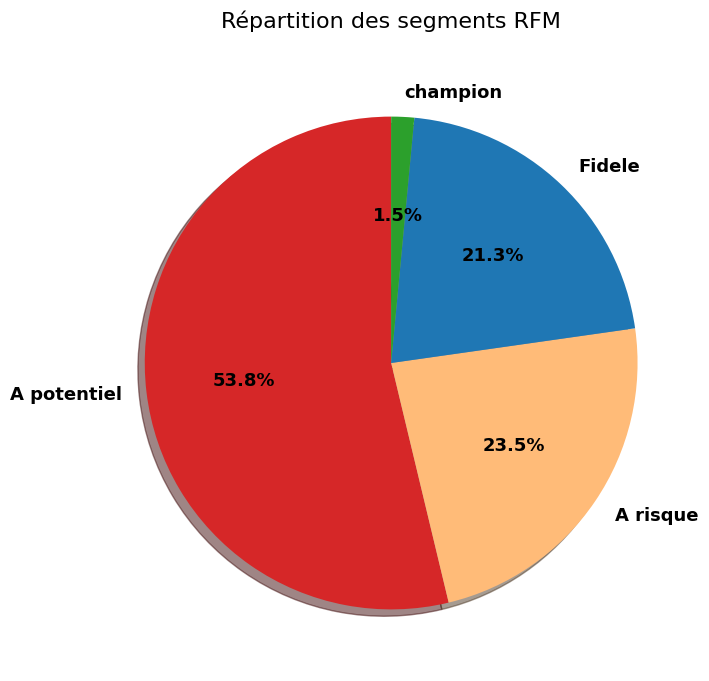

In [96]:
plt.figure(figsize=(8, 8))
df['segment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['#d62728', '#ffbb78', '#1f77b4', '#2ca02c'],  # rouge → vert
    shadow=True,
    startangle=90,
    textprops={'fontsize': 13, 'fontweight': 'bold'}
)
plt.title("Répartition des segments RFM", fontsize=16, pad=20)
plt.ylabel('')  # enlève le label inutile
plt.show()